## 1. Perceptron Trick
Steps: 
- Decide number of iterations for loop: $epoch$ (generally 1000)
- Decide a learning rate: $\eta$ (generally 0.01)
- Initialize with random line/plane for classification
- For each iteration, pick a random instance and classify it.
- According to classification update the weights according to learning rate 
    - $$w_{i,j}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i$$

- This function handles all cases (four): 
$$
\begin{array}{|c|c|c|c|c|}
\hline
y & \hat{y} & (y - \hat{y}) & \text{Prediction} & W_{\text{next step}} \\
\hline
1 & 1 & 0 & \text{Correct prediction} & W \\
\hline
1 & 0 & 1 & \text{Wrong prediction} & W + \eta x \\
\hline
0 & 1 & -1 & \text{Wrong prediction} & W - \eta x \\
\hline
0 & 0 & 0 & \text{Correct prediction} & W \\
\hline
\end{array}
$$



### `DEMO`

In [1]:
#Load the data (ignore)

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())

#I will try binary classification for simplicity here: setosa, versicolor 
#And two features: petal_length and petal_width
print("Original targets:", iris['target'].unique())
print("Original targets:", iris['target_names'])
print("Features: ", iris['data'].columns)
data = iris['frame'][iris['frame']['target']!=2][['petal length (cm)','petal width (cm)', 'target']]
print("We using: ", data['target'].unique())
print("We using: ", "['setosa' 'versicolor']")

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Original targets: [0 1 2]
Original targets: ['setosa' 'versicolor' 'virginica']
Features:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
We using:  [0 1]
We using:  ['setosa' 'versicolor']


In [2]:
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [23]:
X = data.iloc[:,0:2].values
y = data.iloc[:,-1].values

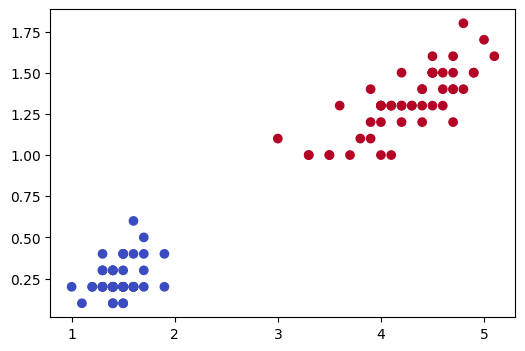

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm')

In [107]:
import numpy as np

def step(Z):
    return 1 if Z>=0 else 0

def perceptron(X,y,epoch=1000,eta=0.01):
    X = np.insert(X,obj=0,values=1,axis=1)
    Weights = np.ones(X.shape[1])         #Initialzing with random weights
    for i in range(epoch):
        j = np.random.choice(X.shape[0])  #index of random instance
        Xi = X[j]
        yi = y[j]
        y_hat = step(Xi @ Weights)

        Weights = Weights + (eta * (yi - y_hat) * Xi)
    
    return Weights

In [ ]:
weights = perceptron(X,y,epoch=1000)
## Visualize the line
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

# We have equation as: w0 + x1w1 + x2w2=0 => Ax + By + C =0 => y = mx + c
C = weights[0]
A = weights[1]
B = weights[2]

intercept = -(C/B)
slope = -(A/B)

x_input = np.linspace(0,6,100)
y = slope*x_input + intercept
plt.plot(x_input, y)

plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm')

In [86]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(X,y)

print(p.intercept_,p.coef_)

[-3.] [[0.9 1.7]]
